In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeleeladekunlefijabi/ship-fuel-consumption-and-co2-emissions-analysis")

print("Path to dataset files:", path)

100%|██████████| 30.0k/30.0k [00:00<00:00, 33.1MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/jeleeladekunlefijabi/ship-fuel-consumption-and-co2-emissions-analysis/versions/1


In [28]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
csv_files

['ship_fuel_efficiency.csv']

In [4]:
ship_df = pd.read_csv(os.path.join(path, csv_files[0]))
ship_df.head()

,ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
0,NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.76,Stormy,92.14
1,NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.73,Moderate,92.98
2,NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.30,HFO,1867.73,5353.01,Calm,87.61
3,NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
4,NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617.03,Calm,85.61


In [5]:
df = ship_df.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ship_id             1440 non-null   object 
 1   ship_type           1440 non-null   object 
 2   route_id            1440 non-null   object 
 3   month               1440 non-null   object 
 4   distance            1440 non-null   float64
 5   fuel_type           1440 non-null   object 
 6   fuel_consumption    1440 non-null   float64
 7   CO2_emissions       1440 non-null   float64
 8   weather_conditions  1440 non-null   object 
 9   engine_efficiency   1440 non-null   float64
dtypes: float64(4), object(6)
memory usage: 112.6+ KB


In [7]:
df.isnull().sum().sort_values(ascending=False)

,0
ship_id,0
ship_type,0
route_id,0
month,0
distance,0
fuel_type,0
fuel_consumption,0
CO2_emissions,0
weather_conditions,0
engine_efficiency,0


In [8]:
df.describe()

,distance,fuel_consumption,CO2_emissions,engine_efficiency
count,1440.000000,1440.000000,1440.000000,1440.000000
mean,151.753354,4844.246535,13365.454882,82.582924
std,108.472230,4892.352813,13567.650118,7.158289
min,20.080000,237.880000,615.680000,70.010000
25%,79.002500,1837.962500,4991.485000,76.255000
50%,123.465000,3060.880000,8423.255000,82.775000
75%,180.780000,4870.675000,13447.120000,88.862500
max,498.550000,24648.520000,71871.210000,94.980000


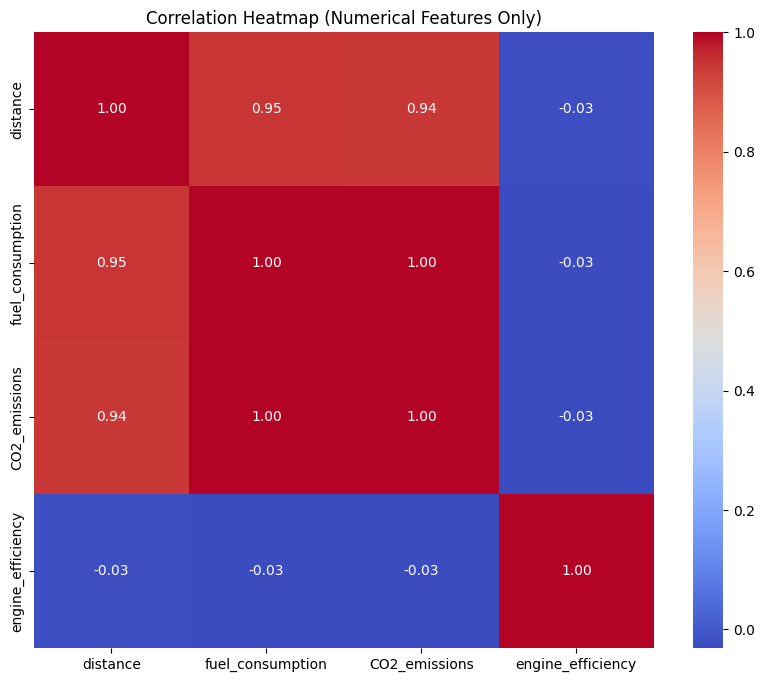

In [9]:
numeric_df = df.select_dtypes(include='number')
corr_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features Only)")
plt.show()

In [10]:
!pip install h2o


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.9/265.9 MB 5.5 MB/s eta 0:00:00


In [11]:
import h2o
from h2o.automl import H2OAutoML

In [12]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.28" 2025-07-15; OpenJDK Runtime Environment (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1); OpenJDK 64-Bit Server VM (build 11.0.28+6-post-Ubuntu-1ubuntu122.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.11/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpkw7ulz2v
  JVM stdout: /tmp/tmpkw7ulz2v/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpkw7ulz2v/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.
Please download and install the latest version from: https://h2o-release.s3.amazonaws.com/h2o/latest_stable.html


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_jmalmt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [13]:
h2o.cluster_info()

/tmp/ipython-input-3484606868.py:1: H2ODeprecationWarning: Deprecated, use ``h2o.cluster().show_status()``.
  h2o.cluster_info()


H2O_cluster_uptime:,09 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.46.0.7
H2O_cluster_version_age:,4 months and 7 days
H2O_cluster_name:,H2O_from_python_unknownUser_jmalmt
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [14]:
h2o_df = h2o.H2OFrame(df)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
train, test = h2o_df.split_frame(ratios=[0.8], seed=42)


In [16]:
h2o_df

ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.8,Stormy,92.14
NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.7,Moderate,92.98
NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.3,HFO,1867.73,5353.01,Calm,87.61
NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617,Calm,85.61
NG001,Oil Service Boat,Port Harcourt-Lagos,June,85.93,Diesel,2342.13,6753.42,Stormy,72.82
NG001,Oil Service Boat,Warri-Bonny,July,85.67,HFO,2974.79,8498.16,Moderate,93.93
NG001,Oil Service Boat,Warri-Bonny,August,44.81,Diesel,1376.38,3509.56,Moderate,91.1
NG001,Oil Service Boat,Escravos-Lagos,September,116.44,Diesel,3661.75,9423.97,Calm,73.41
NG001,Oil Service Boat,Lagos-Apapa,October,99.73,HFO,2551.99,6416.66,Moderate,94.68


In [17]:
target = 'CO2_emissions'


In [18]:
features = [col for col in h2o_df.columns if col != target]


In [21]:
model = H2OAutoML(max_models=20, seed=42, max_runtime_secs=300)


In [22]:
model.train(x=features, y=target, training_frame=train, validation_frame=test)


AutoML progress: |
12:44:33.950: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20250804_124433_model_3


Model Summary: 
    number_of_trees
--  -----------------
    39

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 15268.434152390766
RMSE: 123.56550551181655
MAE: 72.75601206940922
RMSLE: 0.010721112036317938
Mean Residual Deviance: 15268.434152390766

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1672951.2066097925
RMSE: 1293.426150427535
MAE: 769.1017877487909
RMSLE: 0.0642132986700694
Mean Residual Deviance: 1672951.2066097925

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 1408162.702178694
RMSE: 1186.6603145714
MAE: 676.7515349862463
RMSLE: 0.06410345605603063
Mean Residual Deviance: 1408162.702178694

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0           nan           nan           nan           nan           nan
loglikelihood           nan          0           nan           nan           nan           nan           nan
mae                     676.725      29.6218     707.087       678.738       641.559       652.203       704.037
mean_residual_deviance  1.40767e+06  344642      1.97564e+06   1.33709e+06   1.19537e+06   1.08929e+06   1.44095e+06
mse                     1.40767e+06  344642      1.97564e+06   1.33709e+06   1.19537e+06   1.08929e+06   1.44095e+06
r2                      0.99202      0.00127719  0.990145      0.992636      0.991317      0.993327      0.992675
residual_deviance       1.40767e+06  344642      1.97564e+06   1.33709e+06   1.19537e+06   1.08929e+06   1.44095e+06
rmse                    1179.86      139.599     1405.57       1156.32       1093.33       1043.69       1200.4
rmsle                   0.0640625    0.00250349  0.0661487     0.0659714     0.0653814     0.0606261     0.062185

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2025-08-04 12:45:32  13.824 sec  0                  18684.5          13146.8         3.49112e+08          20372.9            14215.2           4.15053e+08
    2025-08-04 12:45:32  13.956 sec  5                  3191.17          2210.4          1.01836e+07          3725.2             2410.35           1.38771e+07
    2025-08-04 12:45:32  14.015 sec  10                 654.985          386.368         429005               1460.59            818.876           2.13333e+06
    2025-08-04 12:45:32  14.103 sec  15                 287.153          133.214         82457                1312.8             772.854           1.72345e+06
    2025-08-04 12:45:32  14.144 sec  20                 215.142          99.4222         46286.1              1285.96            763.328           1.6537e+06
    2025-08-04 12:45:32  14.200 sec  25                 183.027          90.4654         33499                1287.97            765.987           1.65885e+06
    2025-08-04 12:45:32  14.244 sec  30                 152.369          82.4038         23216.4              1290.16            767.345           1.6645e+06
    2025-08-04 12:45:32  14.288 sec  35                 135.826          76.7297         18448.7              1294.08            769.416           1.67463e+06
    2025-08-04 12:45:32  14.344 sec  39                 123.566          72.756          15268.4              1293.43            769.102           1.67295e+06

Variable Importances: 
variable                    relative_importance    scaled_importance       percentage
--

In [23]:
model.leaderboard


model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_grid_1_AutoML_2_20250804_124433_model_3,1186.66,1.40816e+06,676.752,0.0641035,1.40816e+06
GBM_grid_1_AutoML_2_20250804_124433_model_2,1266.22,1.60332e+06,724.073,0.0733798,1.60332e+06
XGBoost_1_AutoML_2_20250804_124433,1300.39,1.69101e+06,752.922,0.0839958,1.69101e+06
XGBoost_grid_1_AutoML_2_20250804_124433_model_2,1328.02,1.76362e+06,743.736,0.0759056,1.76362e+06
XGBoost_2_AutoML_2_20250804_124433,1336.97,1.78749e+06,768.318,0.0798827,1.78749e+06
XRT_1_AutoML_2_20250804_124433,1391.4,1.93599e+06,754.78,0.090973,1.93599e+06
GBM_grid_1_AutoML_2_20250804_124433_model_1,1407.03,1.97974e+06,764.958,0.0787081,1.97974e+06
GBM_4_AutoML_2_20250804_124433,1416.29,2.00589e+06,809.265,0.0885802,2.00589e+06
XGBoost_3_AutoML_2_20250804_124433,1529.78,2.34023e+06,888.308,0.101581,2.34023e+06
GBM_2_AutoML_2_20250804_124433,1562.87,2.44258e+06,917.998,0.106743,2.44258e+06


In [24]:
best_model_aml = model.leader
best_model_aml

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_grid_1_AutoML_2_20250804_124433_model_3


Model Summary: 
    number_of_trees
--  -----------------
    39

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 15268.434152390766
RMSE: 123.56550551181655
MAE: 72.75601206940922
RMSLE: 0.010721112036317938
Mean Residual Deviance: 15268.434152390766

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 1672951.2066097925
RMSE: 1293.426150427535
MAE: 769.1017877487909
RMSLE: 0.0642132986700694
Mean Residual Deviance: 1672951.2066097925

ModelMetricsRegression: xgboost
** Reported on cross-validation data. **

MSE: 1408162.702178694
RMSE: 1186.6603145714
MAE: 676.7515349862463
RMSLE: 0.06410345605603063
Mean Residual Deviance: 1408162.702178694

Cross-Validation Metrics Summary: 
                        mean         sd          cv_1_valid    cv_2_valid    cv_3_valid    cv_4_valid    cv_5_valid
----------------------  -----------  ----------  ------------  ------------  ------------  ------------  ------------
aic                     nan          0           nan           nan           nan           nan           nan
loglikelihood           nan          0           nan           nan           nan           nan           nan
mae                     676.725      29.6218     707.087       678.738       641.559       652.203       704.037
mean_residual_deviance  1.40767e+06  344642      1.97564e+06   1.33709e+06   1.19537e+06   1.08929e+06   1.44095e+06
mse                     1.40767e+06  344642      1.97564e+06   1.33709e+06   1.19537e+06   1.08929e+06   1.44095e+06
r2                      0.99202      0.00127719  0.990145      0.992636      0.991317      0.993327      0.992675
residual_deviance       1.40767e+06  344642      1.97564e+06   1.33709e+06   1.19537e+06   1.08929e+06   1.44095e+06
rmse                    1179.86      139.599     1405.57       1156.32       1093.33       1043.69       1200.4
rmsle                   0.0640625    0.00250349  0.0661487     0.0659714     0.0653814     0.0606261     0.062185

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2025-08-04 12:45:32  13.824 sec  0                  18684.5          13146.8         3.49112e+08          20372.9            14215.2           4.15053e+08
    2025-08-04 12:45:32  13.956 sec  5                  3191.17          2210.4          1.01836e+07          3725.2             2410.35           1.38771e+07
    2025-08-04 12:45:32  14.015 sec  10                 654.985          386.368         429005               1460.59            818.876           2.13333e+06
    2025-08-04 12:45:32  14.103 sec  15                 287.153          133.214         82457                1312.8             772.854           1.72345e+06
    2025-08-04 12:45:32  14.144 sec  20                 215.142          99.4222         46286.1              1285.96            763.328           1.6537e+06
    2025-08-04 12:45:32  14.200 sec  25                 183.027          90.4654         33499                1287.97            765.987           1.65885e+06
    2025-08-04 12:45:32  14.244 sec  30                 152.369          82.4038         23216.4              1290.16            767.345           1.6645e+06
    2025-08-04 12:45:32  14.288 sec  35                 135.826          76.7297         18448.7              1294.08            769.416           1.67463e+06
    2025-08-04 12:45:32  14.344 sec  39                 123.566          72.756          15268.4              1293.43            769.102           1.67295e+06

Variable Importances: 
variable                    relative_importance    scaled_importance       percentage
--

In [59]:
model_performance_xgboost = best_model_aml.model_performance(test_data=test)
print(model_performance_xgboost)

ModelMetricsRegression: xgboost
** Reported on test data. **

MSE: 1672951.2066097925
RMSE: 1293.426150427535
MAE: 769.1017877487909
RMSLE: 0.0642132986700694
Mean Residual Deviance: 1672951.2066097925


In [79]:
predictions_xgboost = best_model_aml.predict(test)
predictions_xgboost

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
10739.7
3764.96
11934.5
14362.5
8806.12
9607.88
2700.16
5587.4
49192.2
34615.2


In [75]:
# save model on the dedicated path
model_path_xgboost  = h2o.save_model(model=best_model_aml, path="/content/sample_data ", force=True)
print(f"Model saved at: {model_path_xgboost}")


Model saved at: /content/sample_data /XGBoost_grid_1_AutoML_2_20250804_124433_model_3


In [112]:
# Convert H2OFrame predictions of xgboost and the actual target values (CO2 emissions) to pandas DataFrames for easier handling
y_true = test[target].as_data_frame().values  # Actual target values from the test set
y_pred_xgboost = predictions_xgboost.as_data_frame().values    # Predicted values from the model

# Calculate the R² (R-squared) score, a measure of how well the model predictions match the true values
r2 = r2_score(y_true, y_pred_xgboost)
print(f"R\u00B2 Score of the Best Model: {r2}")

R² Score of the Best Model: 0.9921450906600858


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

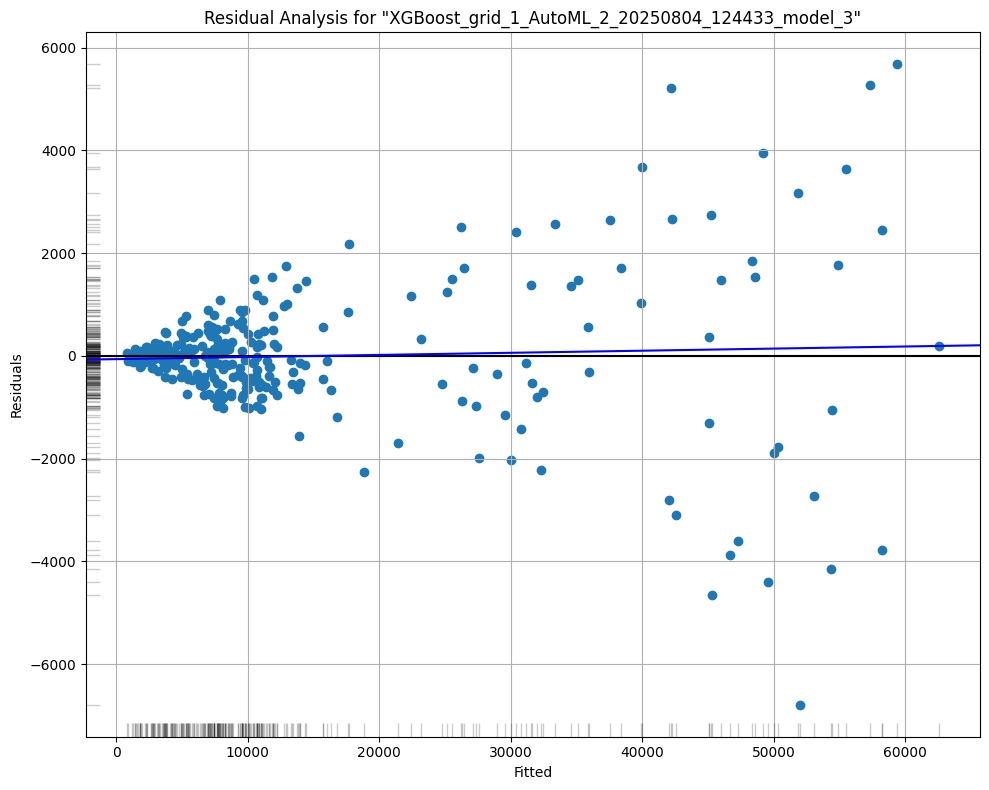

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

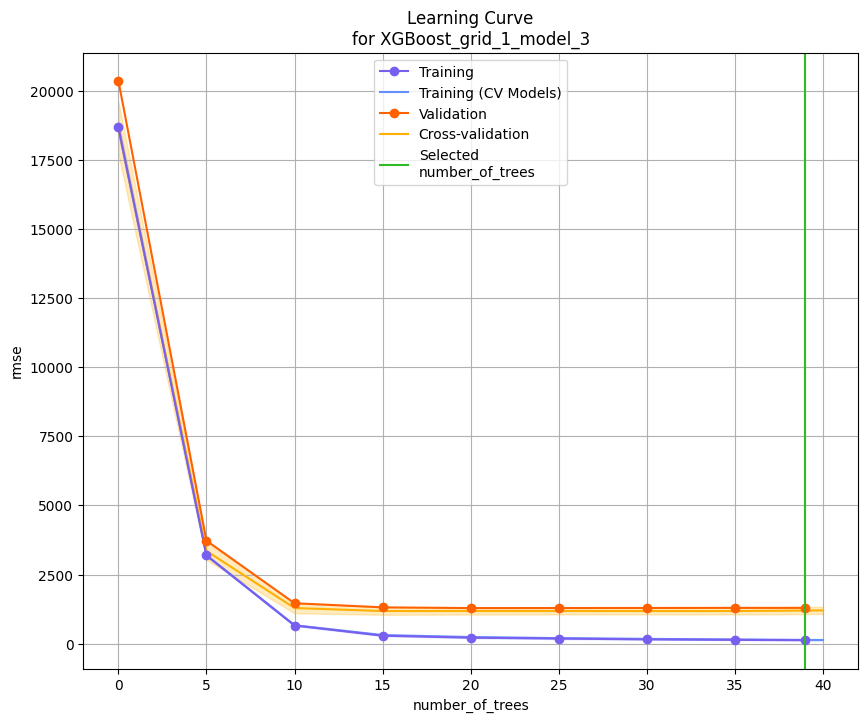

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

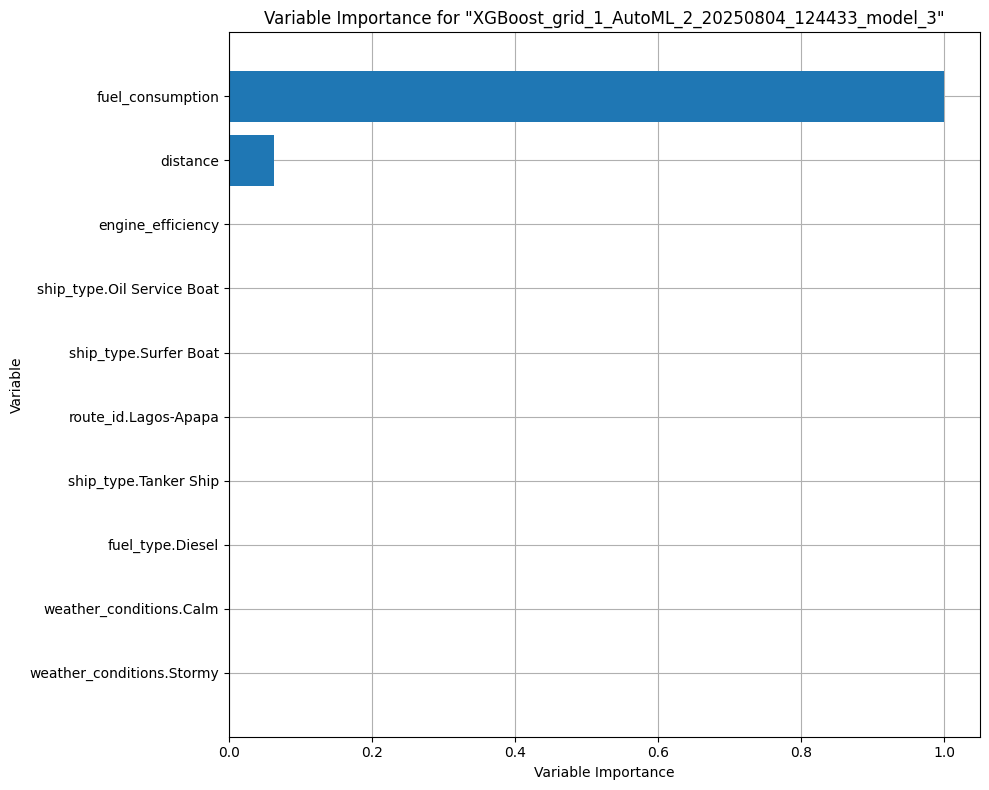

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

H2OResponseError: Server error java.lang.IllegalArgumentException:
  Error: Incorrect number of arguments; 'cols_py' expects 2 but was passed 3
  Request: POST /99/Rapids
    data: {'ast': "(tmp= py_26_sid_8ce3 (levels (tmp= py_25_sid_8ce3 (as.factor (cols_py py_24_sid_8ce3 np.str_('ship_id'))))))", 'session_id': '_sid_8ce3'}


In [98]:
h2o.explain(best_model_aml, test, include_explanations='ALL', figsize=(10,8), sequential_colormap='RdYIBu_r')

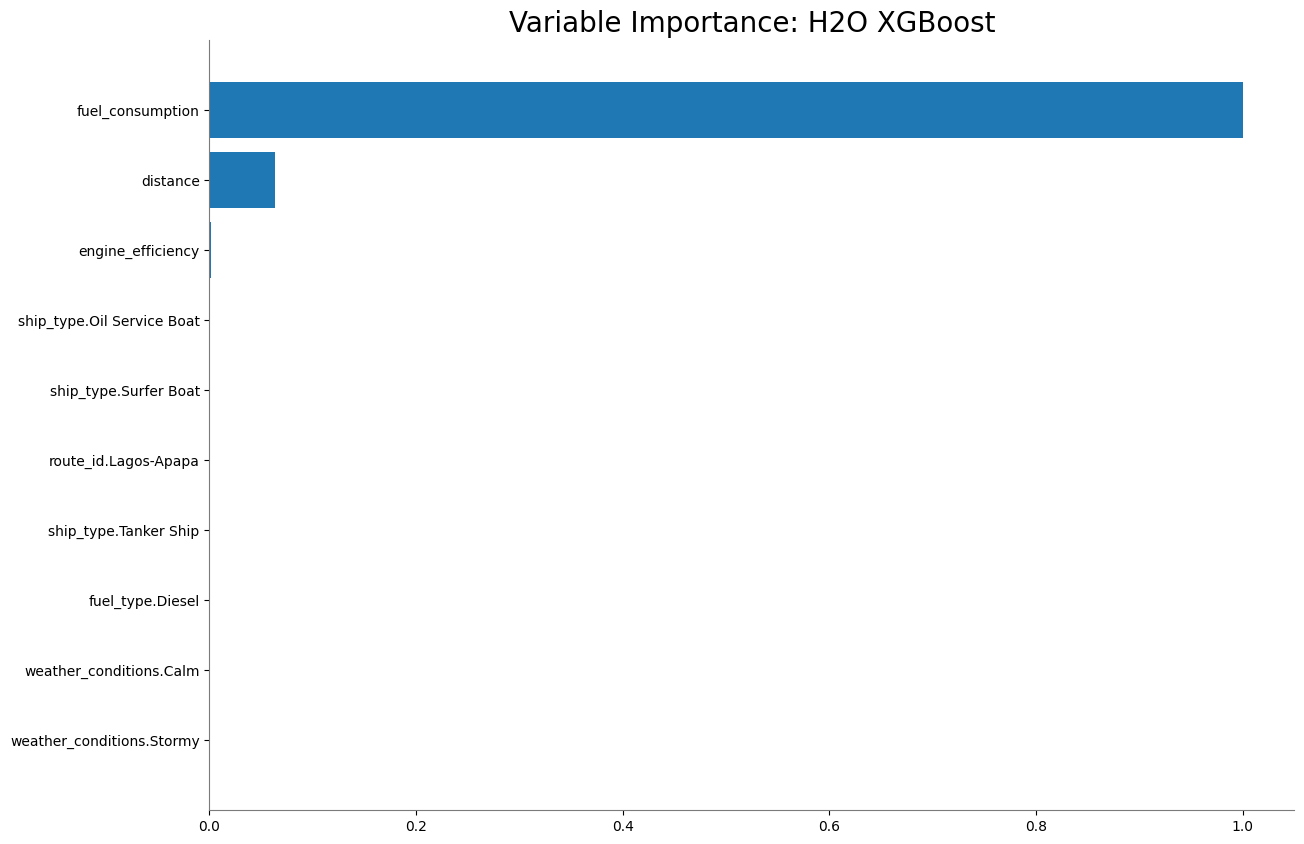

<Figure size 640x480 with 0 Axes>

In [93]:

# Use best model (must be a tree-based model)
best_model_aml = h2o.get_model("XGBoost_grid_1_AutoML_2_20250804_124433_model_3")

# Plot feature importance
best_model_aml.varimp_plot()

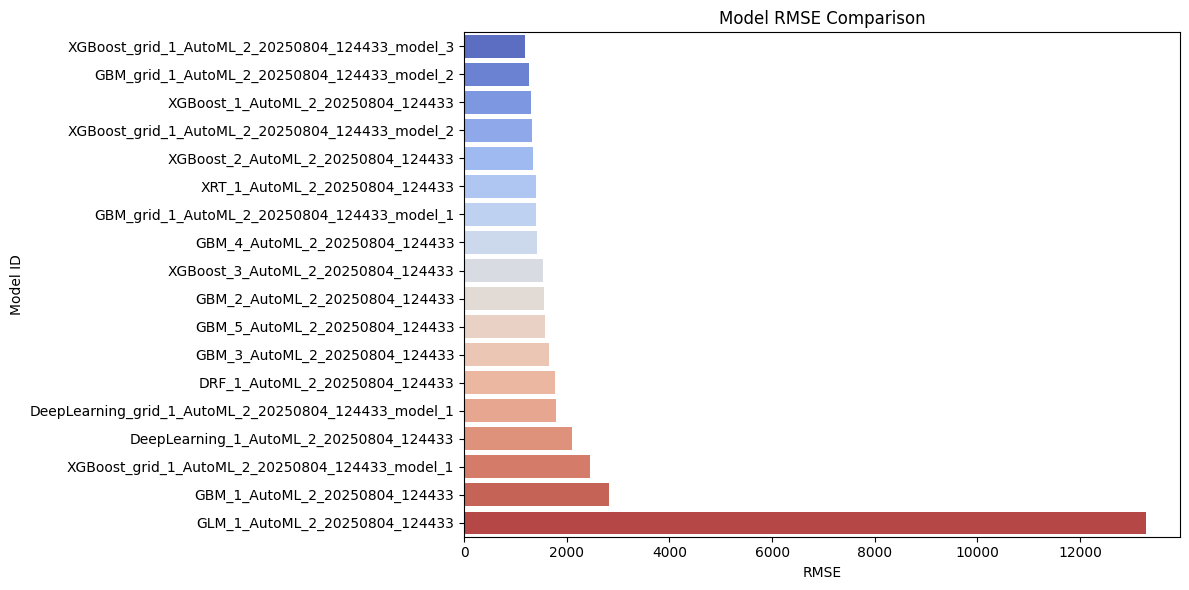

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert H2O leaderboard to Pandas DataFrame
lb = model.leaderboard.as_data_frame()

# Plot RMSE of each model
plt.figure(figsize=(12,6))
sns.barplot(x="rmse", y="model_id", data=lb.sort_values("rmse", ascending=True), palette="coolwarm")
plt.title("Model RMSE Comparison")
plt.xlabel("RMSE")
plt.ylabel("Model ID")
plt.tight_layout()
plt.show()


In [113]:
import pandas as pd
import numpy as np


# Combine into one DataFrame for xgboost model
df_results_xgb = pd.DataFrame({
    "Actual": np.ravel(y_true),
    "Predicted": np.ravel(y_pred_xgboost)
})


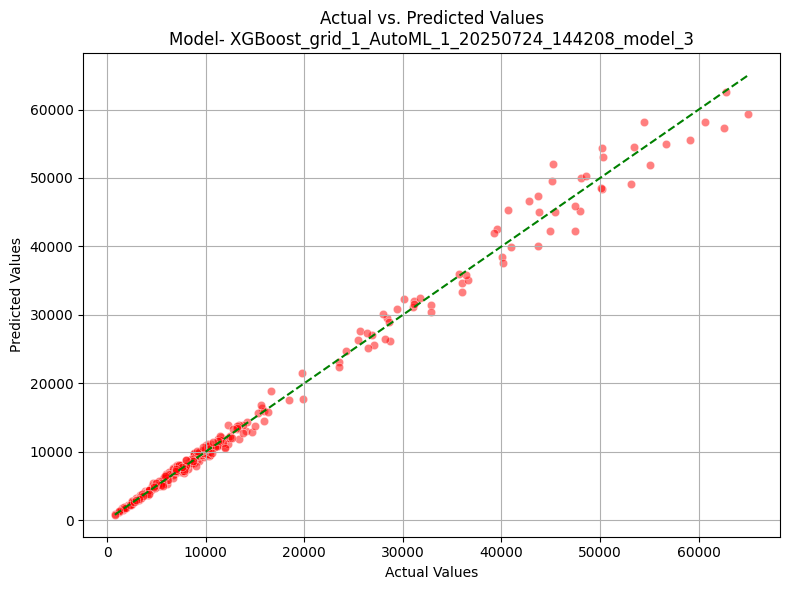

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results_xgb, x="Actual", y="Predicted",color='r' ,alpha=0.5)
plt.plot([df_results_xgb.min().min(), df_results_xgb.max().max()], [df_results_xgb.min().min(), df_results_xgb.max().max()], 'g--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values\nModel- XGBoost_grid_1_AutoML_1_20250724_144208_model_3")
plt.grid(True)
plt.tight_layout()
plt.show()


In [115]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.grid.grid_search import H2OGridSearch

In [116]:
hyper_params = {
    "max_depth": [3, 5, 9],
    "sample_rate": [0.8, 1.0],
    "col_sample_rate": [0.2, 0.5, 1.0]
}

In [39]:
gbm_model = H2OGradientBoostingEstimator()


In [40]:
grid = H2OGridSearch(model=gbm_model, hyper_params=hyper_params)


In [41]:
grid.train(x=features, y=target, training_frame=train, validation_frame=test)


gbm Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


,col_sample_rate,max_depth,sample_rate,model_ids,residual_deviance
,1.0,3.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_12,1559254.1092121
,1.0,3.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_3,1656156.2097332
,1.0,5.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_15,1664537.0182984
,1.0,5.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_6,1686836.6076714
,1.0,9.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_9,1702597.3973229
,1.0,9.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_18,1816919.9139611
,0.5,9.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_8,2614701.3278097
,0.5,3.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_2,2817615.2991204
,0.5,9.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_17,2894898.7293575
,0.5,5.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_5,3463674.2935325


In [46]:
grid.get_grid(sort_by='residual_deviance', decreasing=None)

,col_sample_rate,max_depth,sample_rate,model_ids,residual_deviance
,1.0,3.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_12,1559254.1092121
,1.0,3.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_3,1656156.2097332
,1.0,5.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_15,1664537.0182984
,1.0,5.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_6,1686836.6076714
,1.0,9.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_9,1702597.3973229
,1.0,9.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_18,1816919.9139611
,0.5,9.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_8,2614701.3278097
,0.5,3.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_2,2817615.2991204
,0.5,9.0,1.0,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_17,2894898.7293575
,0.5,5.0,0.8,Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_5,3463674.2935325


In [47]:
best_grid_model = h2o.get_model("Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_12")


In [64]:
model_performance_gbm = best_grid_model.model_performance(test_data=test)
model_performance_gbm

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 1559254.1092121324
RMSE: 1248.7009686919173
MAE: 735.7719858500323
RMSLE: 0.08083805623175035
Mean Residual Deviance: 1559254.1092121324

In [78]:
prediction_gbm = best_grid_model.predict(test)
prediction_gbm

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


predict
11009.7
3908.32
12135.1
13877.1
8471.92
9164.74
2729.44
5416.87
48105.4
35591.1


In [77]:
# save model on the dedicated path

model_path_GBM = h2o.save_model(model=best_grid_model, path="/content/sample_data ", force=True)
print(f"Model saved at: {model_path_GBM}")


Model saved at: /content/sample_data /Grid_GBM_py_2_sid_8ce3_model_python_1754311343925_27_model_12


In [106]:
# Convert H2OFrame predictions of gbm model and the actual target values (CO2 emissions) to pandas DataFrames for easier handling
y_pred_gbm = prediction_gbm.as_data_frame().values
y_true = test[target].as_data_frame().values

# Combine into one DataFrame for gbm model
df_results_gbm = pd.DataFrame({
    "Actual": np.ravel(y_true),
    "Predicted": np.ravel(y_preds)
})


In [121]:
# Calculate the R² (R-squared) score, a measure of how well the model predictions match the true values
r2 = r2_score(y_true, y_pred_gbm)
print(f"R\u00B2 Score of the Best Model: {r2}")

R² Score of the Best Model: 0.9926789262878608


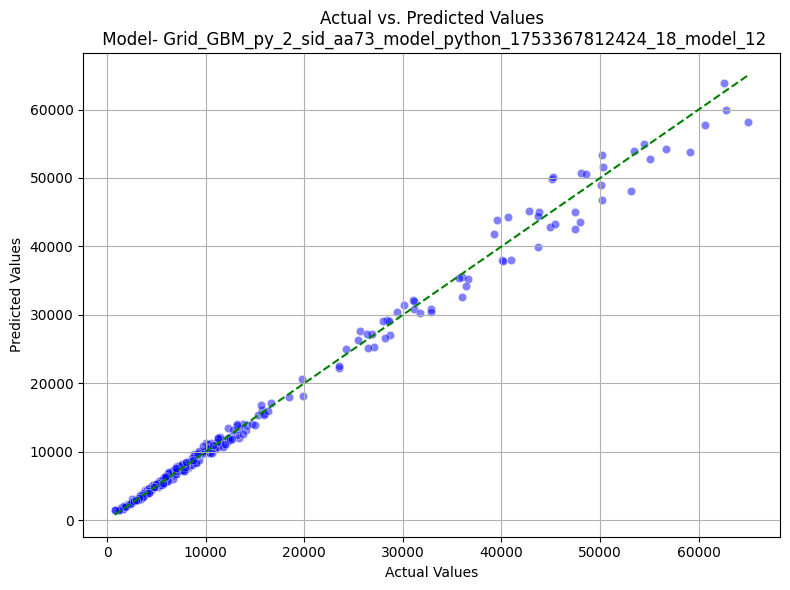

In [122]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_results_gbm, x="Actual", y="Predicted",color='b' ,alpha=0.5)
plt.plot([df_results_gbm.min().min(), df_results_gbm.max().max()], [df_results_gbm.min().min(), df_results_gbm.max().max()], 'g--')  # Diagonal line
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values\n Model- Grid_GBM_py_2_sid_aa73_model_python_1753367812424_18_model_12")
plt.grid(True)
plt.tight_layout()
plt.show()


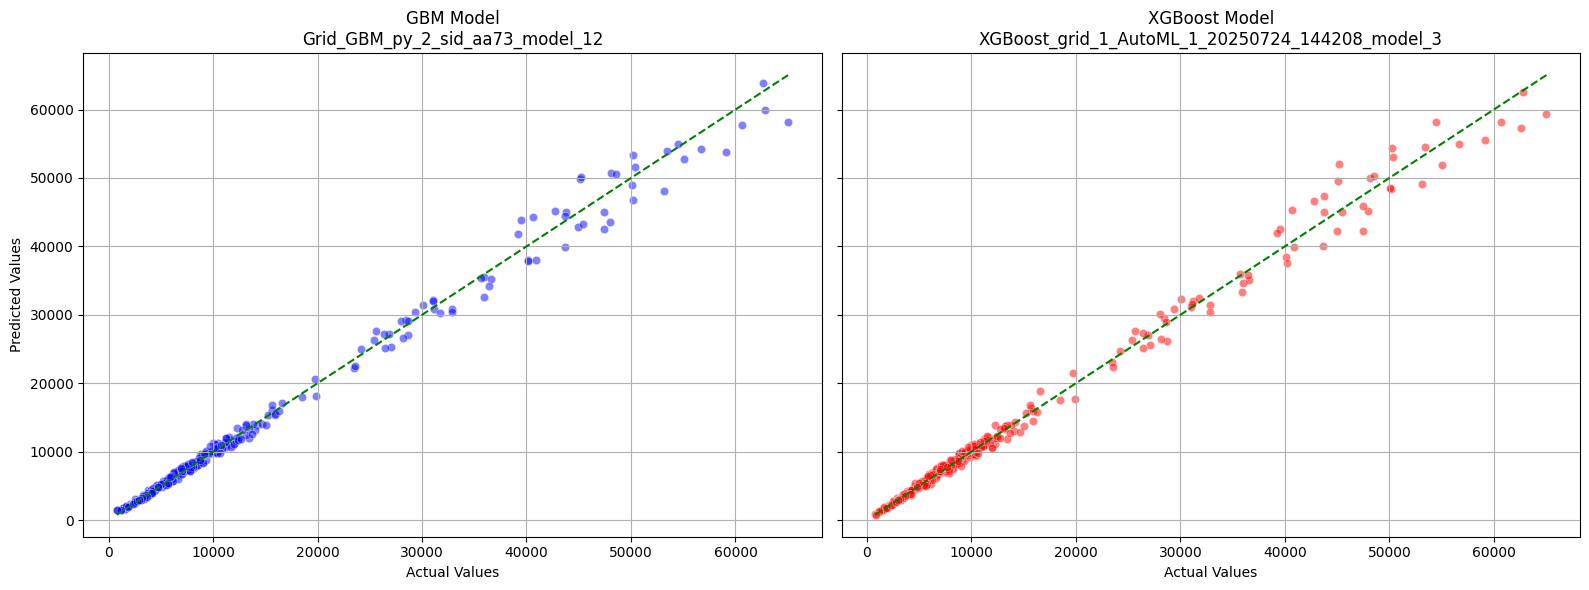

In [123]:
# compaire both models values Actual vs predictive values
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot 1: GBM Model
sns.scatterplot(data=df_results_gbm, x="Actual", y="Predicted", color='b', alpha=0.5, ax=axes[0])
axes[0].plot(
    [df_results_gbm.min().min(), df_results_gbm.max().max()],
    [df_results_gbm.min().min(), df_results_gbm.max().max()],
    'g--'
)
axes[0].set_title("GBM Model\nGrid_GBM_py_2_sid_aa73_model_12")
axes[0].set_xlabel("Actual Values")
axes[0].set_ylabel("Predicted Values")
axes[0].grid(True)

# Plot 2: XGBoost Model
sns.scatterplot(data=df_results_xgb, x="Actual", y="Predicted", color='r', alpha=0.5, ax=axes[1])
axes[1].plot(
    [df_results_xgb.min().min(), df_results_xgb.max().max()],
    [df_results_xgb.min().min(), df_results_xgb.max().max()],
    'g--'
)
axes[1].set_title("XGBoost Model\nXGBoost_grid_1_AutoML_1_20250724_144208_model_3")
axes[1].set_xlabel("Actual Values")
axes[1].grid(True)

plt.tight_layout()
plt.show()


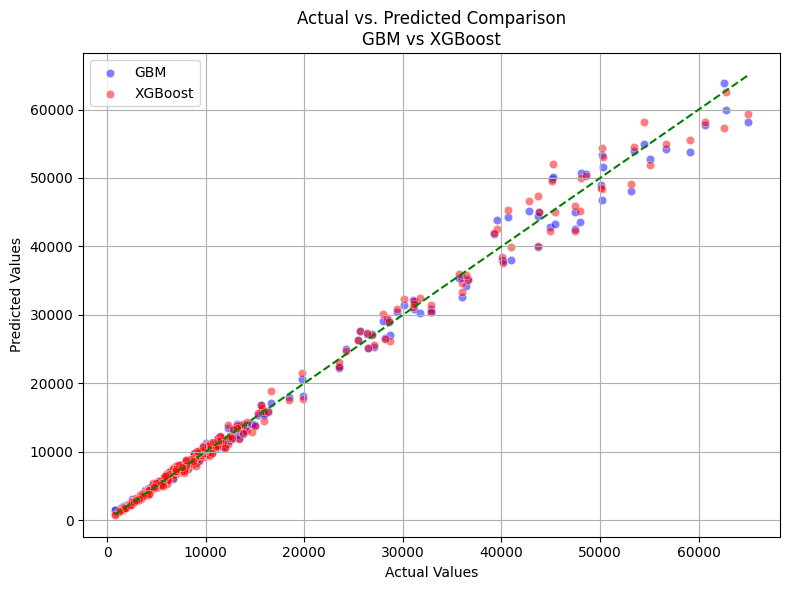

In [110]:
# Ploting Actual vs. Predicted Comparison of GBM vs XGBoost on same graph
plt.figure(figsize=(8, 6))

# GBM
sns.scatterplot(data=df_results_gbm, x="Actual", y="Predicted", label="GBM", color='blue', alpha=0.5)

# XGBoost
sns.scatterplot(data=df_results_xgb, x="Actual", y="Predicted", label="XGBoost", color='red', alpha=0.5)

# Diagonal reference line
min_val = min(df_results_gbm.min().min(), df_results_xgb.min().min())
max_val = max(df_results_gbm.max().max(), df_results_xgb.max().max())
plt.plot([min_val, max_val], [min_val, max_val], 'g--')

plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Comparison\nGBM vs XGBoost")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
import pandas as pd

# Create a new pandas DataFrame for prediction (For example values)

new_data = pd.DataFrame({
    "fuel_consumption": [3779.77],
    "distance": [132.26],
    "engine_efficiency":[92.14]
})

# Convert to H2OFrame
new_data_h2o = h2o.H2OFrame(new_data)


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [128]:
# model_path_gbm
# Load model from saved path
loaded_model = h2o.load_model(model_path_GBM)

# Now use loaded_model to make predictions
pred = loaded_model.predict(new_data_h2o)
print(pred)


gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%
  predict
  10575.6
[1 row x 1 column]



In [129]:
# model_path_xgboost
# Load model from saved path
loaded_model = h2o.load_model(model_path_xgboost)

# Now use loaded_model to make predictions
preds = loaded_model.predict(new_data_h2o)
print(pred)

xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%
  predict
  10575.6
[1 row x 1 column]



In [130]:
h2o_df

ship_id,ship_type,route_id,month,distance,fuel_type,fuel_consumption,CO2_emissions,weather_conditions,engine_efficiency
NG001,Oil Service Boat,Warri-Bonny,January,132.26,HFO,3779.77,10625.8,Stormy,92.14
NG001,Oil Service Boat,Port Harcourt-Lagos,February,128.52,HFO,4461.44,12779.7,Moderate,92.98
NG001,Oil Service Boat,Port Harcourt-Lagos,March,67.3,HFO,1867.73,5353.01,Calm,87.61
NG001,Oil Service Boat,Port Harcourt-Lagos,April,71.68,Diesel,2393.51,6506.52,Stormy,87.42
NG001,Oil Service Boat,Lagos-Apapa,May,134.32,HFO,4267.19,11617,Calm,85.61
NG001,Oil Service Boat,Port Harcourt-Lagos,June,85.93,Diesel,2342.13,6753.42,Stormy,72.82
NG001,Oil Service Boat,Warri-Bonny,July,85.67,HFO,2974.79,8498.16,Moderate,93.93
NG001,Oil Service Boat,Warri-Bonny,August,44.81,Diesel,1376.38,3509.56,Moderate,91.1
NG001,Oil Service Boat,Escravos-Lagos,September,116.44,Diesel,3661.75,9423.97,Calm,73.41
NG001,Oil Service Boat,Lagos-Apapa,October,99.73,HFO,2551.99,6416.66,Moderate,94.68


In [150]:
# error calculated for gbm model

df_results_gbm["Error"] = abs(df_results_gbm["Actual"] - df_results_gbm["Predicted"])
df_results_gbm.sort_values("Error", ascending=False).head(10)

,Actual,Predicted,Model,Error
78,65037.14,58127.616484,GBM,6909.523516
34,59126.35,53799.261311,GBM,5327.088689
8,53142.22,48105.415795,GBM,5036.804205
96,47446.22,42487.521208,GBM,4958.698792
279,45190.91,50072.905680,GBM,4881.995680
143,45132.58,49847.349065,GBM,4714.769065
24,39498.78,43849.135088,GBM,4350.355088
206,47965.14,43637.819025,GBM,4327.320975
164,43677.22,39916.319354,GBM,3760.900646
285,40637.91,44294.239480,GBM,3656.329480


In [151]:
# error calculated for xgboost model
df_results_xgb["Error"] = (abs(df_results_xgb["Actual"] - df_results_xgb["Predicted"]))
df_results_xgb.sort_values("Error", ascending=False).head(10)


,Actual,Predicted,Model,Error
279,45190.91,51981.125000,XGBoost,6790.215000
78,65037.14,59361.136719,XGBoost,5676.003281
227,62594.91,57325.898438,XGBoost,5269.011563
96,47446.22,42227.250000,XGBoost,5218.970000
285,40637.91,45296.769531,XGBoost,4658.859531
143,45132.58,49530.554688,XGBoost,4397.974687
92,50221.53,54365.136719,XGBoost,4143.606719
8,53142.22,49192.246094,XGBoost,3949.973906
25,42773.35,46640.500000,XGBoost,3867.150000
152,54487.42,58256.628906,XGBoost,3769.208906


In [154]:
df_results_gbm["Model"] = "GBM"
df_results_xgb["Model"] = "XGBoost"


In [155]:
# df_results_gbm["Error"] = abs(df_results_gbm["Actual"] - df_results_gbm["Predicted"])
# df_results_xgb["Error"] = abs(df_results_xgb["Actual"] - df_results_xgb["Predicted"])


In [159]:
df_combined = pd.concat([df_results_gbm, df_results_xgb], ignore_index=True)
df_combined.sample(10)

,Actual,Predicted,Model,Error
88,8502.55,8198.953651,GBM,303.596349
172,8352.16,7881.230308,GBM,470.929692
108,2509.99,2758.740410,GBM,248.750410
531,29374.70,30798.878906,XGBoost,1424.178906
512,6215.44,5856.347168,XGBoost,359.092832
346,10191.39,10591.557617,XGBoost,400.167617
47,2411.85,2539.072276,GBM,127.222276
579,40637.91,45296.769531,XGBoost,4658.859531
113,9986.38,11195.528037,GBM,1209.148037
71,10477.94,10165.362841,GBM,312.577159


In [160]:
df_combined_sorted = df_combined.sort_values("Error", ascending=False)
df_combined_sorted.head(20)


,Actual,Predicted,Model,Error
78,65037.14,58127.616484,GBM,6909.523516
573,45190.91,51981.125000,XGBoost,6790.215000
372,65037.14,59361.136719,XGBoost,5676.003281
34,59126.35,53799.261311,GBM,5327.088689
521,62594.91,57325.898438,XGBoost,5269.011563
390,47446.22,42227.250000,XGBoost,5218.970000
8,53142.22,48105.415795,GBM,5036.804205
96,47446.22,42487.521208,GBM,4958.698792
279,45190.91,50072.905680,GBM,4881.995680
143,45132.58,49847.349065,GBM,4714.769065


In [165]:
df_compare = pd.merge(
    df_results_gbm[['Actual', 'Predicted', 'Error']],
    df_results_xgb[['Actual', 'Predicted', 'Error']],
    left_index=True,
    right_index=True,
    suffixes=('_GBM', '_XGB')
)

df_compare.head(10)


,Actual_GBM,Predicted_GBM,Error_GBM,Actual_XGB,Predicted_XGB,Error_XGB
0,11930.11,11009.749954,920.360046,11930.11,10739.742188,1190.367813
1,3649.81,3908.323565,258.513565,3649.81,3764.964600,115.154600
2,12442.34,12135.145969,307.194031,12442.34,11934.542969,507.797031
3,14184.19,13877.053806,307.136194,14184.19,14362.461914,178.271914
4,9081.23,8471.920285,609.309715,9081.23,8806.122070,275.107930
5,8854.93,9164.736164,309.806164,8854.93,9607.875000,752.945000
6,2612.85,2729.435714,116.585714,2612.85,2700.161621,87.311621
7,5617.77,5416.874832,200.895168,5617.77,5587.403809,30.366191
8,53142.22,48105.415795,5036.804205,53142.22,49192.246094,3949.973906
9,35971.47,35591.149010,380.320990,35971.47,34615.191406,1356.278594


In [166]:
# Reassign the DataFrame with reordered columns

# Reorder columns
df_compare = df_compare[['Actual_GBM', 'Predicted_GBM', 'Predicted_XGB', 'Error_GBM', 'Error_XGB']]

# Optionally rename 'Actual_GBM' to just 'Actual' for clarity
df_compare.rename(columns={"Actual_GBM": "Actual"}, inplace=True)

df_compare.head(10)


,Actual,Predicted_GBM,Predicted_XGB,Error_GBM,Error_XGB
0,11930.11,11009.749954,10739.742188,920.360046,1190.367813
1,3649.81,3908.323565,3764.964600,258.513565,115.154600
2,12442.34,12135.145969,11934.542969,307.194031,507.797031
3,14184.19,13877.053806,14362.461914,307.136194,178.271914
4,9081.23,8471.920285,8806.122070,609.309715,275.107930
5,8854.93,9164.736164,9607.875000,309.806164,752.945000
6,2612.85,2729.435714,2700.161621,116.585714,87.311621
7,5617.77,5416.874832,5587.403809,200.895168,30.366191
8,53142.22,48105.415795,49192.246094,5036.804205,3949.973906
9,35971.47,35591.149010,34615.191406,380.320990,1356.278594
